<a href="https://colab.research.google.com/github/Namanm23/Deep-Learning-Codes/blob/main/Exp_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 26s 48ms/step - accuracy: 0.5220 - loss: 0.6895 - val_accuracy: 0.7366 - val_loss: 0.5298
Epoch 2/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 36s 44ms/step - accuracy: 0.7797 - loss: 0.4780 - val_accuracy: 0.7178 - val_loss: 0.5465
Epoch 3/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8361 - loss: 0.3880 - val_accuracy: 0.8177 - val_loss: 0.4357
Epoch 4/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 40ms/step - accuracy: 0.8745 - loss: 0.3180 - val_accuracy: 0.8374 - val_loss: 0.3988
Epoch 5/5
391/391 ━━━━━━━━━━━━━━━━━━━━ 20s 39ms/step - accuracy: 0.8960 - loss: 0.2652 - val_accuracy: 0.7776 - val_loss: 0.4839
782/782 - 8s - 10ms/step - accuracy: 0.7776 - loss: 0.4839
Test Accuracy: 0.7776


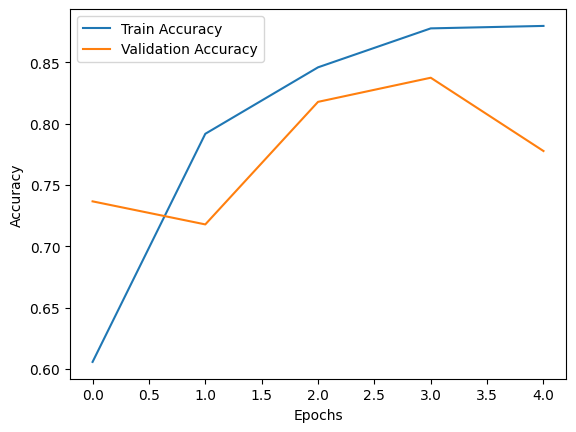

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load and preprocess IMDB dataset
max_words = 10000  # Vocabulary size
max_len = 200  # Sequence length

(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=max_words)

# Pad sequences to ensure equal length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

# Define RNN model for sequence modeling
def create_rnn_model():
    model = keras.Sequential([
        layers.Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
        layers.SimpleRNN(64, return_sequences=True),  # RNN layer
        layers.SimpleRNN(64),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create and train model
model = create_rnn_model()
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'Test Accuracy: {test_acc:.4f}')

# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
